In [1]:
import pandas as pd

df = pd.read_csv("../../data/default.csv")
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,10000.0,835.374886,483.714985,0.000000,481.731105,823.636973,1166.308386,2654.322576
income,10000.0,33516.981876,13336.639563,771.967729,21340.462903,34552.644802,43807.729272,73554.233495


<Axes: xlabel='default', ylabel='balance'>

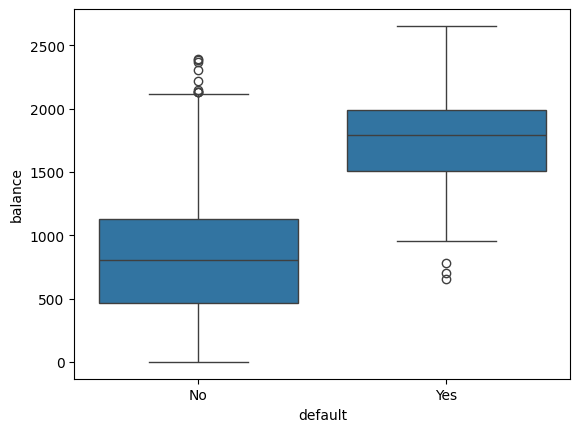

In [4]:
import seaborn as sns
sns.boxplot(data=df, x="default", y="balance")

# Dummy encoding

In [5]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [6]:
df_dummies = pd.get_dummies(df, drop_first=True)*1
df_dummies.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


### Logistic Regression

train|test split

In [7]:
X,y = df_dummies.drop("default_Yes", axis=1), df_dummies["default_Yes"]
X.head()

,balance,income,student_Yes
0,729.526495,44361.625074,0
1,817.180407,12106.134700,1
2,1073.549164,31767.138947,0
3,529.250605,35704.493935,0
4,785.655883,38463.495879,0


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: default_Yes, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

((6700, 3), (3300, 3))

In [15]:
print(f"Proportion default in training data: {y_train.sum()/len(X_train):.3f}")
print(f"Proportion default in test data: {y_test.sum()/len(X_test):.3f}")

Proportion default in training data: 0.033
Proportion default in test data: 0.033
